# Import Libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import datetime

# Load Data Set

For this task, I am interested to analyze and predict the stock prices of the company I work in, that is Qorvo, Inc.

In [0]:
data = pd.read_csv('Qorvo_historic_stock_data.csv')

# First Look

In [101]:
data.head()

,date,close,volume,open,high,low
0,16:00,69.07,"1,027,678",69.85,70.00,69.020
1,2019/03/05,69.86,1010498.0000,70.26,70.56,69.320
2,2019/03/04,70.05,930256.0000,70.84,71.24,69.195
3,2019/03/01,70.50,1182367.0000,70.60,71.23,69.550
4,2019/02/28,70.14,1166371.0000,68.87,70.34,68.870


In [102]:
data.describe()

,close,open,high,low
count,1050.000000,1050.000000,1050.000000,1050.000000
mean,65.169771,65.139029,66.157305,64.093273
std,11.837153,11.860606,11.882128,11.757264
min,34.530000,34.540000,34.900000,33.300000
25%,55.155000,55.067500,55.942500,54.372500
50%,67.305000,67.285000,68.115000,66.230000
75%,74.145000,73.982500,75.245000,72.642500
max,87.810000,87.900000,88.350000,85.860000


The data is from 1/2/2015 till today. That's all the data since the company was formed

# Data Preprocessing

#### The value of date in first row is not in right format for processing, so lets correct it first

In [0]:
data.at[0, 'date'] = datetime.date.today().strftime('%Y/%m/%d')

#### Create variables to use as data and label

In [0]:
prices = data['close'].tolist()
dates = data.index.tolist()

#### Convert to 1D vector

In [0]:
dates = np.reshape(dates, (len(dates), 1))
prices = np.reshape(prices, (len(prices), 1))

### Train Test Split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(dates, prices, test_size=0.25)

# Linear Regression Model

In [0]:
reg_model = LinearRegression()

In [113]:
reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Plots

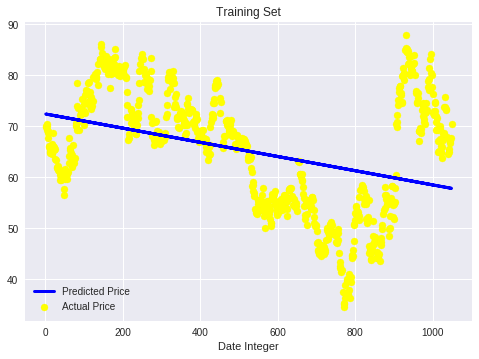

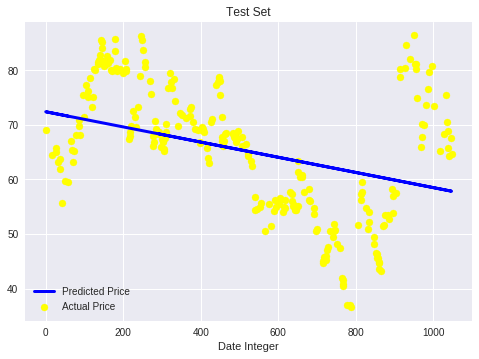

In [114]:
#Train Set Graph
plt.scatter(X_train, y_train, color='yellow', label= 'Actual Price') #plotting the initial datapoints
plt.plot(X_train, reg_model.predict(X_train), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Training Set')
plt.legend()
plt.xlabel('Date Integer')
plt.show()
 
#Test Set Graph
plt.scatter(X_test, y_test, color='yellow', label= 'Actual Price') #plotting the initial datapoints
plt.plot(X_test, reg_model.predict(X_test), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Test Set')
plt.legend()
plt.xlabel('Date Integer')
plt.show()